In [1]:
import pandas as pd
import calendar
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',None)

In [2]:
data_jan = pd.read_csv('Sales_January_2019.csv')
data_feb = pd.read_csv('Sales_February_2019.csv')
data_mar = pd.read_csv('Sales_March_2019.csv')
data_apr = pd.read_csv('Sales_April_2019.csv')
data_may = pd.read_csv('Sales_May_2019.csv')
data_jun = pd.read_csv('Sales_June_2019.csv')
data_jul = pd.read_csv('Sales_July_2019.csv')
data_aug = pd.read_csv('Sales_August_2019.csv')
data_sep = pd.read_csv('Sales_September_2019.csv')
data_oct = pd.read_csv('Sales_October_2019.csv')
data_nov = pd.read_csv('Sales_November_2019.csv')
data_dec = pd.read_csv('Sales_December_2019.csv')

In [3]:
dataset = pd.concat([data_jan,data_feb,data_mar,data_apr,data_may,data_jun,data_jul,data_aug,data_sep,data_oct,data_nov,data_dec],axis = 0)

In [4]:
dataset['Order Date']= pd.to_datetime(dataset['Order Date'],errors = 'coerce')

In [5]:
dataset['month'] = pd.DatetimeIndex(dataset['Order Date']).month

In [6]:
dataset['month'].isnull().sum() # in all there are 900 null values


900

In [7]:
dummy = dataset.dropna(axis = 0)


In [8]:
dummy['monthName'] = dummy['month'].apply(lambda x: calendar.month_name[int(x)])


C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
del dummy['month']


In [10]:
# Creating a sales column
dummy['Quantity Ordered'] = dummy['Quantity Ordered'].astype('int64')
dummy['Price Each'] = dummy['Price Each'].astype('float32')


C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
dummy['Sales'] = dummy['Quantity Ordered']*dummy['Price Each']

C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
dum = dummy.pivot_table(index = 'monthName',values = 'Sales',aggfunc = 'sum')


In [13]:
dum_temp = dum.sort_values(by='Sales', ascending=False) # Month of December had the highest sales


In [14]:
# Visulaizing the above result in plot
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

<BarContainer object of 12 artists>

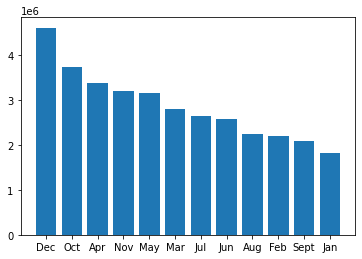

In [16]:
x_tick = ['Dec','Oct','Apr','Nov','May','Mar','Jul','Jun','Aug','Feb','Sept','Jan']
plt.bar(x = x_tick, height = dum_temp.Sales)

In [17]:
# Which city had the highest number of sales?
dummy['City'] = dummy['Purchase Address'].apply(lambda x : x .split(',')[1])


C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
city_sales = dummy.pivot_table(index = 'City',values = 'Sales',aggfunc = 'sum')

In [19]:
x = city_sales.sort_values('Sales', ascending = False) # SanFrancisco had the highest number of sales

([<matplotlib.axis.XTick at 0x1d5ba316cc0>,
 <a list of 9 Text major ticklabel objects>)

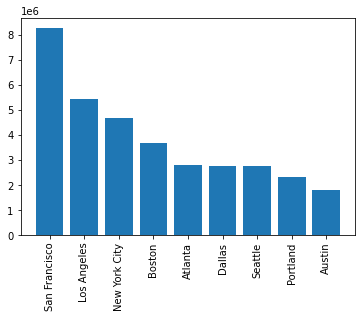

In [20]:
cities = ['San Francisco','Los Angeles','New York City','Boston','Atlanta','Dallas','Seattle','Portland','Austin']
plt.bar(cities,x.Sales)
#labels = [8262204.00,5452571.00,4664317.50,3661642.00,2795498.50,2767975.50,2747755.50,2320490.50,1819581.75]
plt.xticks(cities,rotation = 'vertical')

In [21]:
type(pd.DatetimeIndex(dataset['Order Date']).time[0])

datetime.time

In [23]:
#What time should we display advertisements to maximize likelihood of customer's buying product?
from datetime import datetime, time

In [24]:
dummy['Hour'] = pd.to_datetime(dummy['Order Date']).dt.hour
dummy['Minute'] = pd.to_datetime(dummy['Order Date']).dt.minute
dummy['Count'] = 1

C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
ans = dummy.groupby(by = dummy.Hour).count()['Count']

In [26]:
type(ans)

pandas.core.series.Series

([<matplotlib.axis.XTick at 0x1d5b7c40358>,
 <a list of 24 Text major ticklabel objects>)

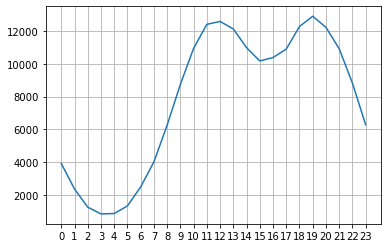

In [27]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(hours,ans)
plt.grid()
plt.xticks(hours)
# Advertsing should be done somewhere between 11 AM - 7 PM 

In [28]:
# What products are most often sold together? 
duplicate = dummy[dummy['Order ID'].duplicated(keep = False)] #this will keep only the duplicated entries in the dataframe.

In [29]:
duplicate.groupby(by = 'Order ID')['Product'].apply(lambda x : ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7136, dtype: object

In [30]:
duplicate['Count'] = 1

C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
x = duplicate.groupby(by = 'Order ID')['Product'].apply(lambda x : ','.join(x))

In [32]:
x_frame = pd.DataFrame(x)

In [33]:
x_frame['Count'] = 1

In [34]:
items = x_frame.groupby(by = 'Product').count()['Count']

In [35]:
items

Product
20in Monitor,20in Monitor                                                                   3
20in Monitor,27in FHD Monitor                                                               2
20in Monitor,34in Ultrawide Monitor                                                         1
20in Monitor,AA Batteries (4-pack)                                                          6
20in Monitor,AAA Batteries (4-pack)                                                         3
20in Monitor,Apple Airpods Headphones                                                       7
20in Monitor,Bose SoundSport Headphones                                                     9
20in Monitor,Flatscreen TV                                                                  1
20in Monitor,Google Phone                                                                   2
20in Monitor,LG Washing Machine                                                             1
20in Monitor,Lightning Charging Cable               

In [36]:
items.sort_values(ascending = False) # these were the items which were frequently sold together.

Product
iPhone,Lightning Charging Cable                                                           882
Google Phone,USB-C Charging Cable                                                         856
iPhone,Wired Headphones                                                                   361
Vareebadd Phone,USB-C Charging Cable                                                      312
Google Phone,Wired Headphones                                                             303
iPhone,Apple Airpods Headphones                                                           286
Google Phone,Bose SoundSport Headphones                                                   161
Vareebadd Phone,Wired Headphones                                                          104
Google Phone,USB-C Charging Cable,Wired Headphones                                         77
Vareebadd Phone,Bose SoundSport Headphones                                                 60
iPhone,Lightning Charging Cable,Wired Headphones    

In [44]:
# Which two items were frequently sold together?
from itertools import combinations

In [40]:
from collections import Counter
c = Counter() 

In [41]:
row_list = []
for row in x_frame['Product']:
    temp = row.split(',')
    row_list.append(temp)

In [151]:
row_list

[['USB-C Charging Cable', 'Wired Headphones'],
 ['Apple Airpods Headphones', 'AA Batteries (4-pack)'],
 ['Vareebadd Phone', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['Google Phone', 'Bose SoundSport Headphones'],
 ['iPhone', 'Apple Airpods Headphones'],
 ['Google Phone', 'Apple Airpods Headphones'],
 ['iPhone', 'Apple Airpods Headphones', 'Wired Headphones'],
 ['USB-C Charging Cable', 'Apple Airpods Headphones'],
 ['Lightning Charging Cable', 'Wired Headphones'],
 ['iPhone', 'Lightning Charging Cable'],
 ['27in FHD Monitor', 'Bose SoundSport Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['iPhone', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
 ['Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['Vareebadd Phone', 'Wired Headphones'],
 ['34in Ultrawide Monitor', 'Lightning Charging Cable'],
 ['USB-C Charging Cable', 'Wired 

In [156]:
count = Counter()
for item in row_list:
    count.update(Counter(combinations(item, 2))) #counter.update is similar to dict.update
    

In [157]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [39]:
# these are top 10 most frequently bought items

,Product,Count
Order ID,,
141275,"USB-C Charging Cable,Wired Headphones",1
141290,"Apple Airpods Headphones,AA Batteries (4-pack)",1
141365,"Vareebadd Phone,Wired Headphones",1
141384,"Google Phone,USB-C Charging Cable",1
141450,"Google Phone,Bose SoundSport Headphones",1
...,...,...
319536,"Macbook Pro Laptop,Wired Headphones",1
319556,"Google Phone,Wired Headphones",1
319584,"iPhone,Wired Headphones",1


In [51]:
dummy

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,monthName,Sales,City,Hour,Minute,Count
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",January,700.000000,Boston,21,25,1
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",January,14.950000,Portland,14,15,1
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",January,23.980000,San Francisco,13,33,1
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",January,149.990005,Los Angeles,20,33,1
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",January,11.990000,Austin,11,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",December,14.950000,San Francisco,20,58,1
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",December,7.680000,Los Angeles,12,1,1
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",December,400.000000,Seattle,6,43,1
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",December,11.990000,Dallas,10,39,1


In [86]:
z = dummy.groupby('Product')
z1 = z.sum()['Quantity Ordered']

In [87]:
prod = []
for indexes in z1.index:
    prod.append(indexes)

In [94]:
z2 = pd.DataFrame(z1)

([<matplotlib.axis.XTick at 0x1d580686e10>,
 <a list of 19 Text major ticklabel objects>)

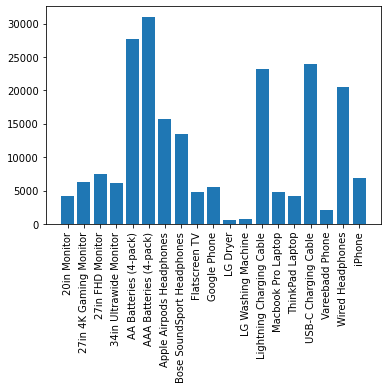

In [96]:
plt.bar(prod,z2['Quantity Ordered'])
plt.xticks(prod,rotation = 'vertical')
# AA Bateries were the most sold

In [97]:
# to get know that why slaes of AA bateries were more as compared to Washing machine and other is because of its cheap price

In [100]:
z3 = dummy.groupby('Product')
z4 = z3.mean()['Price Each']

In [103]:
z5 = pd.DataFrame(z4)

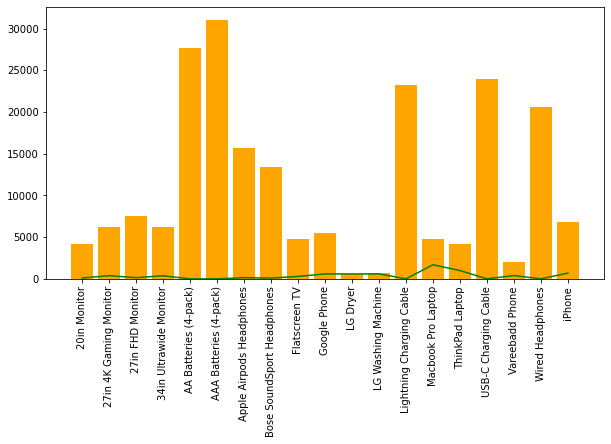

In [115]:
plt.figure(figsize=(10,5))
plt.bar(prod,z2['Quantity Ordered'],color = 'orange')
plt.xticks(prod,rotation = 'vertical')
plt.plot(z5['Price Each'],color = 'green')

In [116]:
# the surge in green line plot at products like Macbook, thinkpad clearly suggest that the reason AA batteries were sold 
# in larger quantity is because of their low price 